<a href="https://colab.research.google.com/github/zzwony/Start_0920/blob/main/12_21_%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
warnings.simplefilter('ignore')

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk

# Do not remove this line!
plt, Axes3D, sns, np, sp, pd, sm, sk

(<module 'matplotlib.pylab' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pylab.py'>,
 mpl_toolkits.mplot3d.axes3d.Axes3D,
 <module 'seaborn' from '/usr/local/lib/python3.8/dist-packages/seaborn/__init__.py'>,
 <module 'numpy' from '/usr/local/lib/python3.8/dist-packages/numpy/__init__.py'>,
 <module 'scipy' from '/usr/local/lib/python3.8/dist-packages/scipy/__init__.py'>,
 <module 'pandas' from '/usr/local/lib/python3.8/dist-packages/pandas/__init__.py'>,
 <module 'statsmodels.api' from '/usr/local/lib/python3.8/dist-packages/statsmodels/api.py'>,
 <module 'sklearn' from '/usr/local/lib/python3.8/dist-packages/sklearn/__init__.py'>)

## 데이터와 행렬
- 스칼라 : 숫자 하나만으로 이루어진 데이터
- 벡터 : 여러 숫자가 특정한 순서대로 모여 있는 것을 의미. 하나의 벡터를 이루는 데이터 수가 n개이면 n-차원 벡터라고 함
- 열벡터는 열의 수가 1인 행렬
- 하나의 데이터 레코드를 단독으로 벡터로 나타낼 때는 하나의 열로 나타내고 복수의 데이터 레코드 집합을 행렬로 나타낼 때는 하나의 데이터 레코드가 하나의 행으로 표기하는 것은 데이터 분석에서 일반적인 관례
- 스칼라와 벡터도 수학적으로는 행렬에 속한다.
- 스칼라는 열과 행의 수가 각각 1인 행렬이고 벡터는 열의 수가 1인 행렬이다.


In [3]:
# 특징벡터: 데이터 벡터가 예측 문제에서 입력 데이터로 사용되면 특징벡터라고 함
from sklearn.datasets import load_iris

iris = load_iris()
x1 = iris.data[0, :]  # 첫 번재 꽃의 데이터
x1 # 특징 벡터

array([5.1, 3.5, 1.4, 0.2])

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# 넘파이를 사용한 벡터 표현: 벡터를 열 개수가 하나인 2차우너 배열 객체로 표현. 배열의 차원은 벡터의 차원과 다른 의미임
x1 = np.array([[5.1],[3.5],[1.4],[0.2]])
x1

array([[5.1],
       [3.5],
       [1.4],
       [0.2]])

In [7]:
# 넘파이는 1차우너 배열 객체도 대부분 벡터로 인정
x1 = np.array([5.1, 3.5, 1.4, 0.2])
x1

array([5.1, 3.5, 1.4, 0.2])

- 벡터 데이터를 처리하는 프로그램에 따라서 두가지 표현법 중 열 표기를 정확하게 요구하는 경우도 있으므로 주의
- 사이킷런 패키지에서 벡터를 요구하는 경우에는 반드시 열 개수가 1개인 2차우너 배열 객체를 넣어야 함

In [10]:
# 한글 깨짐 해결방법 : 실행 후 Restart runtime 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [8]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

(8, 8)
<class 'numpy.ndarray'>
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<function matplotlib.pyplot.show(*args, **kw)>

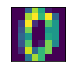

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
print(digits.images[0].shape)
print(type(digits.images[0]))
print(digits.images[0])
plt.figure(figsize=(1,1))
plt.imshow(digits.images[0])
plt.grid(False);plt.xticks([]);plt.yticks([])
plt.show

위에 import 부분은 실행시키지x

- 전치 연산

In [3]:
import numpy as np

A = np.array([[11,12,13], [21,22,23]])
A

array([[11, 12, 13],
       [21, 22, 23]])

In [4]:
# 전치 - 열과 행을 서로 바꿔버림
A.T

array([[11, 21],
       [12, 22],
       [13, 23]])

In [5]:
x1 = np.array([5.1, 3.5, 1.4, 0.2])
x1

array([5.1, 3.5, 1.4, 0.2])

In [6]:
x1.T

array([5.1, 3.5, 1.4, 0.2])

행으로 한걸 열로 표현한 것이다.

## Python Numpy 선형대수(중요)

- 단위행렬 (Unit matrix): np.eye(n)
- 대각행렬 (Diagonal matrix): np.diag(x)
- 내적 (Dot product, Inner product): np.dot(a, b)
- 대각합 (Trace): np.trace(x)
- 행렬식 (Matrix Determinant): np.linalg.det(x)
- 역행렬 (Inverse of a matrix): np.linalg.inv(x)
- 고유값 (Eigenvalue), 고유벡터 (Eigenvector): w, v = np.linalg.eig(x)
- 특이값 분해 (Singular Value Decomposition): u, s, vh = np.linalg.svd(A)
- 연립방정식 해 풀기 (Solve a linear matrix equation): np.linalg.solve(a, b)
- 최소자승 해 풀기 (Compute the Least-squares solution): m, c = np.linalg.lstsq(A, y, rcond=None)[0]

https://rfriend.tistory.com/380


벡터 a를 벡터 b와 같은 방향의 성분과 그렇지 않은 성분으로 분해한다고 할 때 $|a|cosθ$의 길이는 벡터 b와 같은 방향의 성분 길이와 같다.  

벡터 a와 b의 내적은 벡터 b의 길이와 벡터 a에서 벡터 b와 같은 방향의 성분 길이를 곱한 것이다.

- 행렬 내적은 행렬 곱이며 두 행렬 A와 B의 내적은 np.dot()을 이용해 계산이 가능
- 행렬 내적의 특성으로 왼쪽 행렬의 열개수와 오른쪽 행렬의 행개수가 동일해야 내적 연산 가능


## Python Numpy 선형대수

- 단위행렬 (Unit matrix)
  - np.eye(n)
  - 단위행렬은 대각원소가 1이고, 나머지는 모두 0인 n차 정방행렬
- 대각행렬 (Diagonal matrix)
  - np.diag(x) 
  - 대각행렬은 대각성분 이외의 모든 성분이 모두 '0'인 n차 정방행렬
- 내적 (Dot product, Inner product)
  - np.dot(a, b)
  - Python에서 '*' 를 사용한 두 행렬 간 곱은 원소 간 곱(element-wise product)을 반환
- 대각합 (Trace)
  - np.trace(x) 
  - 정방행렬의 대각에 위치한 원소를 전부 더해줍니다
- 행렬식 (Matrix Determinant)
  - np.linalg.det(x) 
  - 역행렬이 존재하는지 여부를 확인하는 방법. 행렬식이 '0'이 아니면 역행렬이 존재
- 역행렬 (Inverse of a matrix)
  - np.linalg.inv(x) 
  - 역행렬은 n차정방행렬 Amn과의 곱이 항등행렬 또는 단위행렬 In이 되는 n차정방행렬
- 고유값 (Eigenvalue), 고유벡터 (Eigenvector)
  - w, v = np.linalg.eig(x) 
  - 정방행렬 A에 대하여 Ax = λx  (상수 λ) 가 성립하는 0이 아닌 벡터 x가 존재할 때 상수 λ 를 행렬 A의 고유값 (eigenvalue), x 를 이에 대응하는 고유벡터 (eigenvector)
- 특이값 분해 (Singular Value Decomposition)
  - u, s, vh = np.linalg.svd(A) 
  - 특이값 분해는 고유값 분해(eigen decomposition)처럼 행렬을 대각화하는 한 방법. 차원축소, 데이터 압축 등에 사용
- 연립방정식 해 풀기 (Solve a linear matrix equation)
  - np.linalg.solve(a, b)
  - <img src='https://t1.daumcdn.net/cfile/tistory/99FE4B3B5B7403642C' width=130>
  - a = np.array([[4, 3], [3, 2]])
  - b = np.array([23, 16])
  - x = np.linalg.solve(a, b)
  - print(x) >> [2. 5.]
- 최소자승 해 풀기 (Compute the Least-squares solution)
  - m, c = np.linalg.lstsq(A, y, rcond=None)[0] 
  - 회귀모형 적합할 때 최소자승법(Least-squares method)으로 잔차 제곱합을 최소화하는 회귀계수를 추정


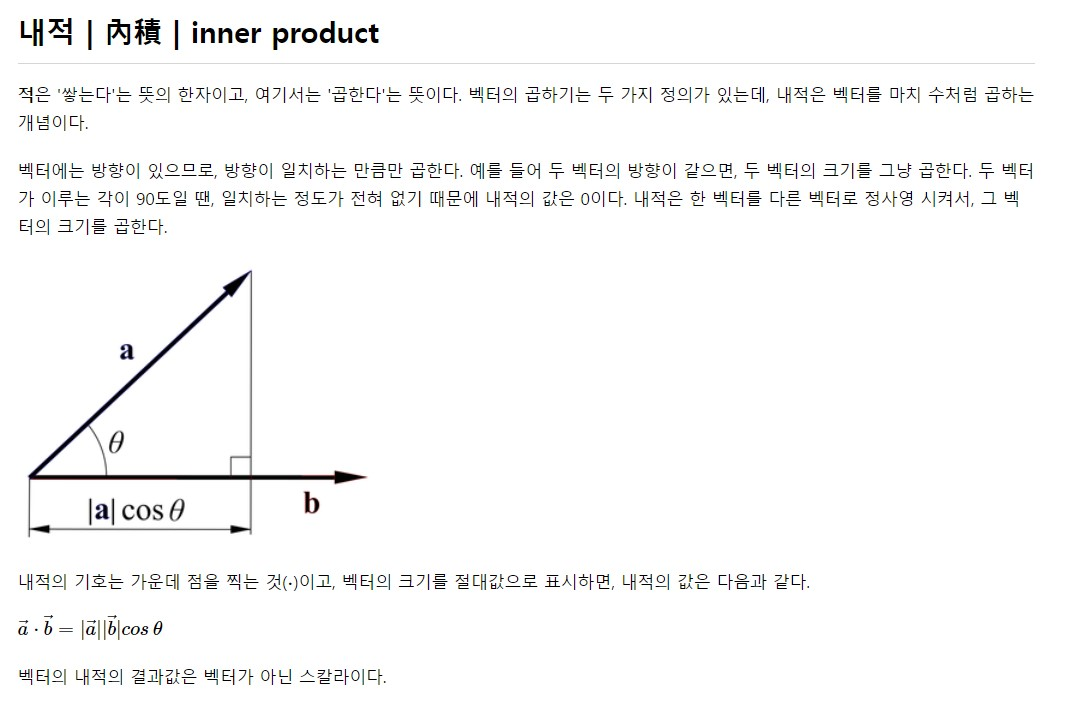

In [10]:
from PIL import Image
from IPython.display import Image

image1 = Image(filename='/content/drive/MyDrive/내적.jpg')
display(image1)

In [7]:
# 영벡터
np.zeros((3,1))

array([[0.],
       [0.],
       [0.]])

In [8]:
# 일벡터
np.ones((3,1))

array([[1.],
       [1.],
       [1.]])